In [2865]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
from highlight_text import fig_text
import matplotlib as mpl
from matplotlib.lines import Line2D
from mplsoccer import Pitch
from mplsoccer import VerticalPitch , Standardizer

In [2866]:
#Set general use colors
text_color = 'w'

In [2867]:
df = pd.read_csv('barca_vs_alaves.csv')

In [2868]:
df

,Unnamed: 0,player,isHome,shotType,goalType,situation,playerCoordinates,bodyPart,goalMouthLocation,goalMouthCoordinates,...,id,time,addedTime,timeSeconds,draw,reversedPeriodTime,reversedPeriodTimeSeconds,periodTimeSeconds,incidentType,blockCoordinates
0,0,"{'name': 'Dani Olmo', 'slug': 'dani-olmo', 'sh...",True,goal,regular,fast-break,"{'x': 13, 'y': 45.4, 'z': 0}",left-foot,low-right,"{'x': 0, 'y': 46.6, 'z': 3.2}",...,6266674,90,3.0,5548,"{'start': {'x': 45.4, 'y': 13}, 'end': {'x': 5...",1,752,148,shot,NaN
1,1,"{'name': 'Jon Pacheco', 'firstName': '', 'last...",False,miss,NaN,corner,"{'x': 9.8, 'y': 49, 'z': 0}",right-foot,left,"{'x': 0, 'y': 63.9, 'z': 5.6}",...,6266536,78,NaN,4656,"{'start': {'x': 49, 'y': 9.8}, 'block': {'x': ...",13,744,1956,shot,"{'x': 4.6, 'y': 40.1, 'z': 0}"
2,2,"{'name': 'Lucas Boyé', 'slug': 'lucas-boye', '...",False,block,NaN,assisted,"{'x': 8.2, 'y': 56.2, 'z': 0}",right-foot,low-centre,"{'x': 0, 'y': 50.3, 'z': 19}",...,6266523,78,NaN,4623,"{'start': {'x': 56.2, 'y': 8.2}, 'block': {'x'...",13,777,1923,shot,"{'x': 6.3, 'y': 54.7, 'z': 0}"
3,3,"{'name': 'Marc Casadó', 'slug': 'marc-casado',...",True,block,NaN,assisted,"{'x': 22.6, 'y': 55.4, 'z': 0}",left-foot,low-right,"{'x': 0, 'y': 48.2, 'z': 19}",...,6266543,74,NaN,4396,"{'start': {'x': 55.4, 'y': 22.6}, 'block': {'x...",17,1004,1696,shot,"{'x': 12.4, 'y': 53.8, 'z': 0}"
4,4,"{'name': 'Lamine Yamal', 'slug': 'lamine-yamal...",True,miss,NaN,regular,"{'x': 15, 'y': 53.6, 'z': 0}",left-foot,right,"{'x': 0, 'y': 26.9, 'z': 20.8}",...,6266519,74,NaN,4382,"{'start': {'x': 53.6, 'y': 15}, 'block': {'x':...",17,1018,1682,shot,"{'x': 1.1, 'y': 71.7, 'z': 0}"
5,5,"{'name': 'Lamine Yamal', 'slug': 'lamine-yamal...",True,block,NaN,assisted,"{'x': 15.6, 'y': 51.5, 'z': 0}",left-foot,low-centre,"{'x': 0, 'y': 51.2, 'z': 19}",...,6266497,74,NaN,4380,"{'start': {'x': 51.5, 'y': 15.6}, 'block': {'x...",17,1020,1680,shot,"{'x': 12.1, 'y': 50.9, 'z': 0}"
6,6,"{'name': 'Lamine Yamal', 'slug': 'lamine-yamal...",True,block,NaN,assisted,"{'x': 17, 'y': 62.4, 'z': 0}",left-foot,low-centre,"{'x': 0, 'y': 49.9, 'z': 19}",...,6266492,73,NaN,4377,"{'start': {'x': 62.4, 'y': 17}, 'block': {'x':...",18,1023,1677,shot,"{'x': 13.8, 'y': 60.1, 'z': 0}"
7,7,"{'name': 'Dani Olmo', 'slug': 'dani-olmo', 'sh...",True,miss,NaN,regular,"{'x': 11.3, 'y': 55.2, 'z': 0}",right-foot,close-left,"{'x': 0, 'y': 58.3, 'z': 2.8}",...,6266438,71,NaN,4239,"{'start': {'x': 55.2, 'y': 11.3}, 'end': {'x':...",20,1161,1539,shot,NaN
8,8,"{'name': 'Lamine Yamal', 'slug': 'lamine-yamal...",True,miss,NaN,corner,"{'x': 22.3, 'y': 80.1, 'z': 0}",left-foot,left,"{'x': 0, 'y': 65.9, 'z': 33.3}",...,6266473,69,NaN,4139,"{'start': {'x': 80.1, 'y': 22.3}, 'end': {'x':...",22,1261,1439,shot,NaN
9,9,"{'name': 'Lamine Yamal', 'slug': 'lamine-yamal...",True,miss,NaN,corner,"{'x': 23.5, 'y': 61.5, 'z': 0}",left-foot,close-high,"{'x': 0, 'y': 55, 'z': 51.4}",...,6266325,65,NaN,3889,"{'start': {'x': 61.5, 'y': 23.5}, 'end': {'x':...",26,1511,1189,shot,NaN


In [2869]:
df.columns

Index(['Unnamed: 0', 'player', 'isHome', 'shotType', 'goalType', 'situation',
       'playerCoordinates', 'bodyPart', 'goalMouthLocation',
       'goalMouthCoordinates', 'xg', 'xgot', 'goalkeeper', 'id', 'time',
       'addedTime', 'timeSeconds', 'draw', 'reversedPeriodTime',
       'reversedPeriodTimeSeconds', 'periodTimeSeconds', 'incidentType',
       'blockCoordinates'],
      dtype='object')

In [2870]:
df.head()

,Unnamed: 0,player,isHome,shotType,goalType,situation,playerCoordinates,bodyPart,goalMouthLocation,goalMouthCoordinates,...,id,time,addedTime,timeSeconds,draw,reversedPeriodTime,reversedPeriodTimeSeconds,periodTimeSeconds,incidentType,blockCoordinates
0,0,"{'name': 'Dani Olmo', 'slug': 'dani-olmo', 'sh...",True,goal,regular,fast-break,"{'x': 13, 'y': 45.4, 'z': 0}",left-foot,low-right,"{'x': 0, 'y': 46.6, 'z': 3.2}",...,6266674,90,3.0,5548,"{'start': {'x': 45.4, 'y': 13}, 'end': {'x': 5...",1,752,148,shot,NaN
1,1,"{'name': 'Jon Pacheco', 'firstName': '', 'last...",False,miss,NaN,corner,"{'x': 9.8, 'y': 49, 'z': 0}",right-foot,left,"{'x': 0, 'y': 63.9, 'z': 5.6}",...,6266536,78,NaN,4656,"{'start': {'x': 49, 'y': 9.8}, 'block': {'x': ...",13,744,1956,shot,"{'x': 4.6, 'y': 40.1, 'z': 0}"
2,2,"{'name': 'Lucas Boyé', 'slug': 'lucas-boye', '...",False,block,NaN,assisted,"{'x': 8.2, 'y': 56.2, 'z': 0}",right-foot,low-centre,"{'x': 0, 'y': 50.3, 'z': 19}",...,6266523,78,NaN,4623,"{'start': {'x': 56.2, 'y': 8.2}, 'block': {'x'...",13,777,1923,shot,"{'x': 6.3, 'y': 54.7, 'z': 0}"
3,3,"{'name': 'Marc Casadó', 'slug': 'marc-casado',...",True,block,NaN,assisted,"{'x': 22.6, 'y': 55.4, 'z': 0}",left-foot,low-right,"{'x': 0, 'y': 48.2, 'z': 19}",...,6266543,74,NaN,4396,"{'start': {'x': 55.4, 'y': 22.6}, 'block': {'x...",17,1004,1696,shot,"{'x': 12.4, 'y': 53.8, 'z': 0}"
4,4,"{'name': 'Lamine Yamal', 'slug': 'lamine-yamal...",True,miss,NaN,regular,"{'x': 15, 'y': 53.6, 'z': 0}",left-foot,right,"{'x': 0, 'y': 26.9, 'z': 20.8}",...,6266519,74,NaN,4382,"{'start': {'x': 53.6, 'y': 15}, 'block': {'x':...",17,1018,1682,shot,"{'x': 1.1, 'y': 71.7, 'z': 0}"


In [2871]:
df.head()

,Unnamed: 0,player,isHome,shotType,goalType,situation,playerCoordinates,bodyPart,goalMouthLocation,goalMouthCoordinates,...,id,time,addedTime,timeSeconds,draw,reversedPeriodTime,reversedPeriodTimeSeconds,periodTimeSeconds,incidentType,blockCoordinates
0,0,"{'name': 'Dani Olmo', 'slug': 'dani-olmo', 'sh...",True,goal,regular,fast-break,"{'x': 13, 'y': 45.4, 'z': 0}",left-foot,low-right,"{'x': 0, 'y': 46.6, 'z': 3.2}",...,6266674,90,3.0,5548,"{'start': {'x': 45.4, 'y': 13}, 'end': {'x': 5...",1,752,148,shot,NaN
1,1,"{'name': 'Jon Pacheco', 'firstName': '', 'last...",False,miss,NaN,corner,"{'x': 9.8, 'y': 49, 'z': 0}",right-foot,left,"{'x': 0, 'y': 63.9, 'z': 5.6}",...,6266536,78,NaN,4656,"{'start': {'x': 49, 'y': 9.8}, 'block': {'x': ...",13,744,1956,shot,"{'x': 4.6, 'y': 40.1, 'z': 0}"
2,2,"{'name': 'Lucas Boyé', 'slug': 'lucas-boye', '...",False,block,NaN,assisted,"{'x': 8.2, 'y': 56.2, 'z': 0}",right-foot,low-centre,"{'x': 0, 'y': 50.3, 'z': 19}",...,6266523,78,NaN,4623,"{'start': {'x': 56.2, 'y': 8.2}, 'block': {'x'...",13,777,1923,shot,"{'x': 6.3, 'y': 54.7, 'z': 0}"
3,3,"{'name': 'Marc Casadó', 'slug': 'marc-casado',...",True,block,NaN,assisted,"{'x': 22.6, 'y': 55.4, 'z': 0}",left-foot,low-right,"{'x': 0, 'y': 48.2, 'z': 19}",...,6266543,74,NaN,4396,"{'start': {'x': 55.4, 'y': 22.6}, 'block': {'x...",17,1004,1696,shot,"{'x': 12.4, 'y': 53.8, 'z': 0}"
4,4,"{'name': 'Lamine Yamal', 'slug': 'lamine-yamal...",True,miss,NaN,regular,"{'x': 15, 'y': 53.6, 'z': 0}",left-foot,right,"{'x': 0, 'y': 26.9, 'z': 20.8}",...,6266519,74,NaN,4382,"{'start': {'x': 53.6, 'y': 15}, 'block': {'x':...",17,1018,1682,shot,"{'x': 1.1, 'y': 71.7, 'z': 0}"


In [2872]:
df['addedTime'] = df['addedTime'].fillna(0)

In [2873]:
df.head()

,Unnamed: 0,player,isHome,shotType,goalType,situation,playerCoordinates,bodyPart,goalMouthLocation,goalMouthCoordinates,...,id,time,addedTime,timeSeconds,draw,reversedPeriodTime,reversedPeriodTimeSeconds,periodTimeSeconds,incidentType,blockCoordinates
0,0,"{'name': 'Dani Olmo', 'slug': 'dani-olmo', 'sh...",True,goal,regular,fast-break,"{'x': 13, 'y': 45.4, 'z': 0}",left-foot,low-right,"{'x': 0, 'y': 46.6, 'z': 3.2}",...,6266674,90,3.0,5548,"{'start': {'x': 45.4, 'y': 13}, 'end': {'x': 5...",1,752,148,shot,NaN
1,1,"{'name': 'Jon Pacheco', 'firstName': '', 'last...",False,miss,NaN,corner,"{'x': 9.8, 'y': 49, 'z': 0}",right-foot,left,"{'x': 0, 'y': 63.9, 'z': 5.6}",...,6266536,78,0.0,4656,"{'start': {'x': 49, 'y': 9.8}, 'block': {'x': ...",13,744,1956,shot,"{'x': 4.6, 'y': 40.1, 'z': 0}"
2,2,"{'name': 'Lucas Boyé', 'slug': 'lucas-boye', '...",False,block,NaN,assisted,"{'x': 8.2, 'y': 56.2, 'z': 0}",right-foot,low-centre,"{'x': 0, 'y': 50.3, 'z': 19}",...,6266523,78,0.0,4623,"{'start': {'x': 56.2, 'y': 8.2}, 'block': {'x'...",13,777,1923,shot,"{'x': 6.3, 'y': 54.7, 'z': 0}"
3,3,"{'name': 'Marc Casadó', 'slug': 'marc-casado',...",True,block,NaN,assisted,"{'x': 22.6, 'y': 55.4, 'z': 0}",left-foot,low-right,"{'x': 0, 'y': 48.2, 'z': 19}",...,6266543,74,0.0,4396,"{'start': {'x': 55.4, 'y': 22.6}, 'block': {'x...",17,1004,1696,shot,"{'x': 12.4, 'y': 53.8, 'z': 0}"
4,4,"{'name': 'Lamine Yamal', 'slug': 'lamine-yamal...",True,miss,NaN,regular,"{'x': 15, 'y': 53.6, 'z': 0}",left-foot,right,"{'x': 0, 'y': 26.9, 'z': 20.8}",...,6266519,74,0.0,4382,"{'start': {'x': 53.6, 'y': 15}, 'block': {'x':...",17,1018,1682,shot,"{'x': 1.1, 'y': 71.7, 'z': 0}"


In [2874]:
df = df.drop(columns=['Unnamed: 0', 'goalType', 'bodyPart', 
                      'goalMouthLocation', 'goalMouthCoordinates', 
                      'goalkeeper', 'id','reversedPeriodTime','draw',
                      'reversedPeriodTimeSeconds','blockCoordinates',
                      'timeSeconds','incidentType','xgot','situation'])

In [2875]:
df.head()

,player,isHome,shotType,playerCoordinates,xg,time,addedTime,periodTimeSeconds
0,"{'name': 'Dani Olmo', 'slug': 'dani-olmo', 'sh...",True,goal,"{'x': 13, 'y': 45.4, 'z': 0}",0.480457,90,3.0,148
1,"{'name': 'Jon Pacheco', 'firstName': '', 'last...",False,miss,"{'x': 9.8, 'y': 49, 'z': 0}",0.060232,78,0.0,1956
2,"{'name': 'Lucas Boyé', 'slug': 'lucas-boye', '...",False,block,"{'x': 8.2, 'y': 56.2, 'z': 0}",0.105042,78,0.0,1923
3,"{'name': 'Marc Casadó', 'slug': 'marc-casado',...",True,block,"{'x': 22.6, 'y': 55.4, 'z': 0}",0.036623,74,0.0,1696
4,"{'name': 'Lamine Yamal', 'slug': 'lamine-yamal...",True,miss,"{'x': 15, 'y': 53.6, 'z': 0}",0.042417,74,0.0,1682


In [2876]:
df.dtypes

player                object
isHome                  bool
shotType              object
playerCoordinates     object
xg                   float64
time                   int64
addedTime            float64
periodTimeSeconds      int64
dtype: object

In [2877]:
df['player'] = df['player'].apply(ast.literal_eval)
df['player_name'] = df['player'].apply(lambda x: x['name'])

In [2878]:
df.head()

,player,isHome,shotType,playerCoordinates,xg,time,addedTime,periodTimeSeconds,player_name
0,"{'name': 'Dani Olmo', 'slug': 'dani-olmo', 'sh...",True,goal,"{'x': 13, 'y': 45.4, 'z': 0}",0.480457,90,3.0,148,Dani Olmo
1,"{'name': 'Jon Pacheco', 'firstName': '', 'last...",False,miss,"{'x': 9.8, 'y': 49, 'z': 0}",0.060232,78,0.0,1956,Jon Pacheco
2,"{'name': 'Lucas Boyé', 'slug': 'lucas-boye', '...",False,block,"{'x': 8.2, 'y': 56.2, 'z': 0}",0.105042,78,0.0,1923,Lucas Boyé
3,"{'name': 'Marc Casadó', 'slug': 'marc-casado',...",True,block,"{'x': 22.6, 'y': 55.4, 'z': 0}",0.036623,74,0.0,1696,Marc Casadó
4,"{'name': 'Lamine Yamal', 'slug': 'lamine-yamal...",True,miss,"{'x': 15, 'y': 53.6, 'z': 0}",0.042417,74,0.0,1682,Lamine Yamal


In [2879]:
df = df.drop(columns= 'player', axis=1)

In [2880]:
df.head()

,isHome,shotType,playerCoordinates,xg,time,addedTime,periodTimeSeconds,player_name
0,True,goal,"{'x': 13, 'y': 45.4, 'z': 0}",0.480457,90,3.0,148,Dani Olmo
1,False,miss,"{'x': 9.8, 'y': 49, 'z': 0}",0.060232,78,0.0,1956,Jon Pacheco
2,False,block,"{'x': 8.2, 'y': 56.2, 'z': 0}",0.105042,78,0.0,1923,Lucas Boyé
3,True,block,"{'x': 22.6, 'y': 55.4, 'z': 0}",0.036623,74,0.0,1696,Marc Casadó
4,True,miss,"{'x': 15, 'y': 53.6, 'z': 0}",0.042417,74,0.0,1682,Lamine Yamal


In [2881]:
cols = list(df.columns)
cols.insert(0, cols.pop(cols.index('player_name')))
df = df[cols]

In [2882]:
df.head()

,player_name,isHome,shotType,playerCoordinates,xg,time,addedTime,periodTimeSeconds
0,Dani Olmo,True,goal,"{'x': 13, 'y': 45.4, 'z': 0}",0.480457,90,3.0,148
1,Jon Pacheco,False,miss,"{'x': 9.8, 'y': 49, 'z': 0}",0.060232,78,0.0,1956
2,Lucas Boyé,False,block,"{'x': 8.2, 'y': 56.2, 'z': 0}",0.105042,78,0.0,1923
3,Marc Casadó,True,block,"{'x': 22.6, 'y': 55.4, 'z': 0}",0.036623,74,0.0,1696
4,Lamine Yamal,True,miss,"{'x': 15, 'y': 53.6, 'z': 0}",0.042417,74,0.0,1682


In [2883]:
df = df.sort_values(by='time')

In [2884]:
df.head()

,player_name,isHome,shotType,playerCoordinates,xg,time,addedTime,periodTimeSeconds
25,Pablo Ibáñez,False,goal,"{'x': 2, 'y': 53.4, 'z': 0}",0.765819,1,0.0,43
26,Victor Parada,False,block,"{'x': 4, 'y': 48.1, 'z': 0}",0.258627,1,0.0,42
24,Abderrahman Rebbach,False,miss,"{'x': 6.6, 'y': 30.1, 'z': 0}",0.063775,2,0.0,114
22,Raphinha,True,block,"{'x': 20.7, 'y': 56.6, 'z': 0}",0.029626,7,0.0,411
23,Raphinha,True,block,"{'x': 10.2, 'y': 36.6, 'z': 0}",0.117208,7,0.0,383


In [2885]:
df = df.reset_index()

In [2886]:
df

,index,player_name,isHome,shotType,playerCoordinates,xg,time,addedTime,periodTimeSeconds
0,25,Pablo Ibáñez,False,goal,"{'x': 2, 'y': 53.4, 'z': 0}",0.765819,1,0.0,43
1,26,Victor Parada,False,block,"{'x': 4, 'y': 48.1, 'z': 0}",0.258627,1,0.0,42
2,24,Abderrahman Rebbach,False,miss,"{'x': 6.6, 'y': 30.1, 'z': 0}",0.063775,2,0.0,114
3,22,Raphinha,True,block,"{'x': 20.7, 'y': 56.6, 'z': 0}",0.029626,7,0.0,411
4,23,Raphinha,True,block,"{'x': 10.2, 'y': 36.6, 'z': 0}",0.117208,7,0.0,383
5,21,Eric García,True,miss,"{'x': 7.5, 'y': 54.5, 'z': 0}",0.153795,7,0.0,418
6,20,Lamine Yamal,True,goal,"{'x': 8.1, 'y': 54.3, 'z': 0}",0.295649,8,0.0,475
7,19,Jonny Otto,False,save,"{'x': 3.2, 'y': 60.6, 'z': 0}",0.209117,24,0.0,1419
8,18,Abderrahman Rebbach,False,miss,"{'x': 22.9, 'y': 41.5, 'z': 0}",0.012899,25,0.0,1459
9,17,Dani Olmo,True,goal,"{'x': 10.4, 'y': 46.2, 'z': 0}",0.352658,26,0.0,1513


In [2887]:
df = df.drop(columns= 'index', axis=1)

In [2888]:
df

,player_name,isHome,shotType,playerCoordinates,xg,time,addedTime,periodTimeSeconds
0,Pablo Ibáñez,False,goal,"{'x': 2, 'y': 53.4, 'z': 0}",0.765819,1,0.0,43
1,Victor Parada,False,block,"{'x': 4, 'y': 48.1, 'z': 0}",0.258627,1,0.0,42
2,Abderrahman Rebbach,False,miss,"{'x': 6.6, 'y': 30.1, 'z': 0}",0.063775,2,0.0,114
3,Raphinha,True,block,"{'x': 20.7, 'y': 56.6, 'z': 0}",0.029626,7,0.0,411
4,Raphinha,True,block,"{'x': 10.2, 'y': 36.6, 'z': 0}",0.117208,7,0.0,383
5,Eric García,True,miss,"{'x': 7.5, 'y': 54.5, 'z': 0}",0.153795,7,0.0,418
6,Lamine Yamal,True,goal,"{'x': 8.1, 'y': 54.3, 'z': 0}",0.295649,8,0.0,475
7,Jonny Otto,False,save,"{'x': 3.2, 'y': 60.6, 'z': 0}",0.209117,24,0.0,1419
8,Abderrahman Rebbach,False,miss,"{'x': 22.9, 'y': 41.5, 'z': 0}",0.012899,25,0.0,1459
9,Dani Olmo,True,goal,"{'x': 10.4, 'y': 46.2, 'z': 0}",0.352658,26,0.0,1513


In [2889]:
df['playerCoordinates'] = df['playerCoordinates'].apply(ast.literal_eval)

df['x'] = df['playerCoordinates'].apply(lambda val: val['x'])
df['y'] = df['playerCoordinates'].apply(lambda val: val['y'])

In [2890]:
df.head()

,player_name,isHome,shotType,playerCoordinates,xg,time,addedTime,periodTimeSeconds,x,y
0,Pablo Ibáñez,False,goal,"{'x': 2, 'y': 53.4, 'z': 0}",0.765819,1,0.0,43,2.0,53.4
1,Victor Parada,False,block,"{'x': 4, 'y': 48.1, 'z': 0}",0.258627,1,0.0,42,4.0,48.1
2,Abderrahman Rebbach,False,miss,"{'x': 6.6, 'y': 30.1, 'z': 0}",0.063775,2,0.0,114,6.6,30.1
3,Raphinha,True,block,"{'x': 20.7, 'y': 56.6, 'z': 0}",0.029626,7,0.0,411,20.7,56.6
4,Raphinha,True,block,"{'x': 10.2, 'y': 36.6, 'z': 0}",0.117208,7,0.0,383,10.2,36.6


In [2891]:
df = df.drop(columns=['playerCoordinates'])

In [2892]:
df.head()

,player_name,isHome,shotType,xg,time,addedTime,periodTimeSeconds,x,y
0,Pablo Ibáñez,False,goal,0.765819,1,0.0,43,2.0,53.4
1,Victor Parada,False,block,0.258627,1,0.0,42,4.0,48.1
2,Abderrahman Rebbach,False,miss,0.063775,2,0.0,114,6.6,30.1
3,Raphinha,True,block,0.029626,7,0.0,411,20.7,56.6
4,Raphinha,True,block,0.117208,7,0.0,383,10.2,36.6


In [2893]:
df = df.rename(columns={'time': 'minute'})
df = df.rename(columns={'periodTimeSeconds': 'second'})

In [2894]:
df

,player_name,isHome,shotType,xg,minute,addedTime,second,x,y
0,Pablo Ibáñez,False,goal,0.765819,1,0.0,43,2.0,53.4
1,Victor Parada,False,block,0.258627,1,0.0,42,4.0,48.1
2,Abderrahman Rebbach,False,miss,0.063775,2,0.0,114,6.6,30.1
3,Raphinha,True,block,0.029626,7,0.0,411,20.7,56.6
4,Raphinha,True,block,0.117208,7,0.0,383,10.2,36.6
5,Eric García,True,miss,0.153795,7,0.0,418,7.5,54.5
6,Lamine Yamal,True,goal,0.295649,8,0.0,475,8.1,54.3
7,Jonny Otto,False,save,0.209117,24,0.0,1419,3.2,60.6
8,Abderrahman Rebbach,False,miss,0.012899,25,0.0,1459,22.9,41.5
9,Dani Olmo,True,goal,0.352658,26,0.0,1513,10.4,46.2


In [2895]:
df.minute = df.minute + df.addedTime

In [2896]:
df = df.drop(columns=['addedTime'])

In [2897]:
df

,player_name,isHome,shotType,xg,minute,second,x,y
0,Pablo Ibáñez,False,goal,0.765819,1.0,43,2.0,53.4
1,Victor Parada,False,block,0.258627,1.0,42,4.0,48.1
2,Abderrahman Rebbach,False,miss,0.063775,2.0,114,6.6,30.1
3,Raphinha,True,block,0.029626,7.0,411,20.7,56.6
4,Raphinha,True,block,0.117208,7.0,383,10.2,36.6
5,Eric García,True,miss,0.153795,7.0,418,7.5,54.5
6,Lamine Yamal,True,goal,0.295649,8.0,475,8.1,54.3
7,Jonny Otto,False,save,0.209117,24.0,1419,3.2,60.6
8,Abderrahman Rebbach,False,miss,0.012899,25.0,1459,22.9,41.5
9,Dani Olmo,True,goal,0.352658,26.0,1513,10.4,46.2


In [2898]:
df ['isHome'] = df['isHome'].astype('str')

In [2899]:
df['isHome'] = df['isHome'].replace('False', 'Alaves')
df['isHome'] = df['isHome'].replace('True', 'Barcelona')


In [2900]:
df

,player_name,isHome,shotType,xg,minute,second,x,y
0,Pablo Ibáñez,Alaves,goal,0.765819,1.0,43,2.0,53.4
1,Victor Parada,Alaves,block,0.258627,1.0,42,4.0,48.1
2,Abderrahman Rebbach,Alaves,miss,0.063775,2.0,114,6.6,30.1
3,Raphinha,Barcelona,block,0.029626,7.0,411,20.7,56.6
4,Raphinha,Barcelona,block,0.117208,7.0,383,10.2,36.6
5,Eric García,Barcelona,miss,0.153795,7.0,418,7.5,54.5
6,Lamine Yamal,Barcelona,goal,0.295649,8.0,475,8.1,54.3
7,Jonny Otto,Alaves,save,0.209117,24.0,1419,3.2,60.6
8,Abderrahman Rebbach,Alaves,miss,0.012899,25.0,1459,22.9,41.5
9,Dani Olmo,Barcelona,goal,0.352658,26.0,1513,10.4,46.2


In [2901]:
df = df.rename(columns={'isHome': 'team'})

In [2902]:
df

,player_name,team,shotType,xg,minute,second,x,y
0,Pablo Ibáñez,Alaves,goal,0.765819,1.0,43,2.0,53.4
1,Victor Parada,Alaves,block,0.258627,1.0,42,4.0,48.1
2,Abderrahman Rebbach,Alaves,miss,0.063775,2.0,114,6.6,30.1
3,Raphinha,Barcelona,block,0.029626,7.0,411,20.7,56.6
4,Raphinha,Barcelona,block,0.117208,7.0,383,10.2,36.6
5,Eric García,Barcelona,miss,0.153795,7.0,418,7.5,54.5
6,Lamine Yamal,Barcelona,goal,0.295649,8.0,475,8.1,54.3
7,Jonny Otto,Alaves,save,0.209117,24.0,1419,3.2,60.6
8,Abderrahman Rebbach,Alaves,miss,0.012899,25.0,1459,22.9,41.5
9,Dani Olmo,Barcelona,goal,0.352658,26.0,1513,10.4,46.2


In [2903]:
Barca_df = df[df['team'] == 'Barcelona']
Barca_df = Barca_df.reset_index(drop=True)

In [2904]:
standardizer = Standardizer(pitch_from='opta', pitch_to='statsbomb')
x_std, y_std = standardizer.transform(Barca_df['x'], Barca_df['y'])

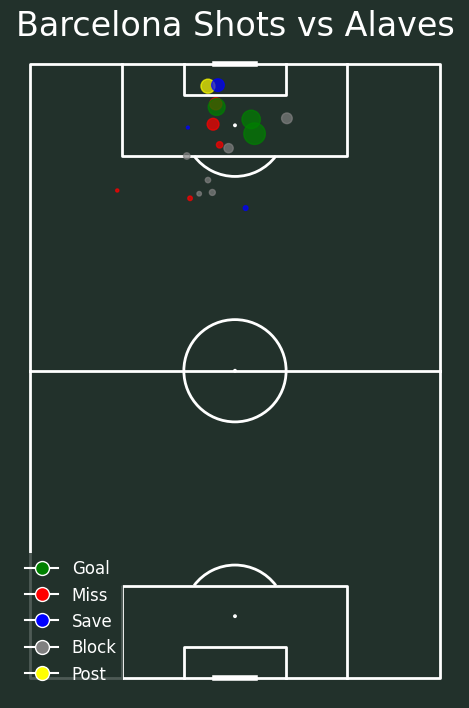

In [2905]:
pitch = VerticalPitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='white', half=False)
fig, ax = pitch.draw(figsize=(13, 8.5), constrained_layout=True, tight_layout=False)
fig.set_facecolor('#22312b')

ax.invert_yaxis()

point_sizes = Barca_df['xg'] * 500

colors = {'goal': 'green', 'miss': 'red', 'save': 'blue', 'block': 'grey', 'post': 'yellow'}

point_colors = [colors[shot_type] for shot_type in Barca_df['shotType']]

pitch.scatter(
    x_std, y_std, 
    ax=ax,
    s=point_sizes,               
    c= point_colors,             
    alpha=0.7            
)


plt.title('Barcelona Shots vs Alaves', fontsize=24, c=text_color)


legend_items = []


for key, value in colors.items():
  
    item = Line2D([0], [0], 
                  marker='o',           
                  color='w',           
                  label=key.title(),   
                  markerfacecolor=value,
                  markersize=10)        
    legend_items.append(item)


ax.legend(
    handles=legend_items,
    loc='lower left',      
    facecolor='#22312b',  
    edgecolor='None',     
    labelcolor='white',     
    fontsize=12
)

In [2906]:
Alaves_df = df[df['team'] == 'Alaves']
Alaves_df = Alaves_df.reset_index(drop=True)

In [2907]:
standardizer = Standardizer(pitch_from='opta', pitch_to='statsbomb')
x_std, y_std = standardizer.transform(Alaves_df['x'], Alaves_df['y'])

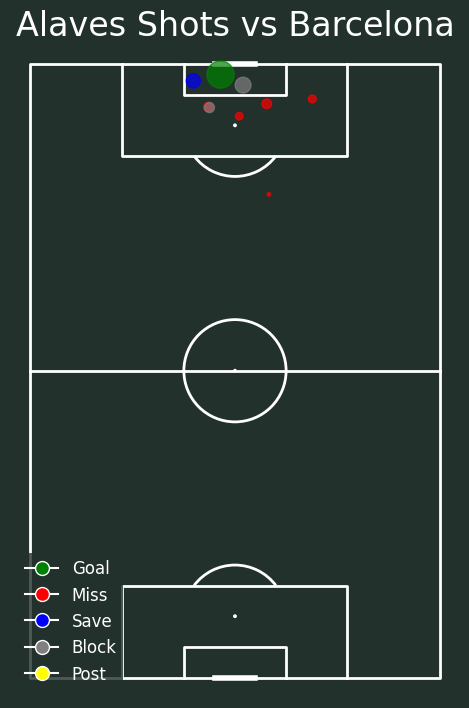

In [2908]:
pitch = VerticalPitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='white', half=False)
fig, ax = pitch.draw(figsize=(13, 8.5), constrained_layout=True, tight_layout=False)
fig.set_facecolor('#22312b')

ax.invert_yaxis()

point_sizes = Alaves_df['xg'] * 500

colors = {'goal': 'green', 'miss': 'red', 'save': 'blue', 'block': 'grey', 'post': 'yellow'}

point_colors = [colors[shot_type] for shot_type in Alaves_df['shotType']]

pitch.scatter(
    x_std, y_std, 
    ax=ax,
    s=point_sizes,               
    c= point_colors,             
    alpha=0.7            
)


plt.title('Alaves Shots vs Barcelona', fontsize=24, c=text_color)


legend_items = []


for key, value in colors.items():
   
    item = Line2D([0], [0], 
                  marker='o',          
                  color='w',           
                  label=key.title(),    
                  markerfacecolor=value,
                  markersize=10)       
    legend_items.append(item)


ax.legend(
    handles=legend_items,
    loc='lower left',       
    facecolor='#22312b',    
    edgecolor='None',      
    labelcolor='white',    
    fontsize=12
)